# Stats and Politics assigment - Part 1

# Renan Peneluppi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# just running the import for all packages I likely need for the assigment.

In [2]:
#load each data set using Pandas

df_census = pd.read_csv('DATA/data.csv')
df_votes = pd.read_csv('DATA/votes.csv')

In [3]:
#JUST CHECK WHAT EACH FILE LOOKS LIKE

df_votes.head()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,0,2630.0,3887.0,2364.0,3967.0,5043
1,1,2099.0,4263.0,1587.0,4917.0,5087
2,2,1845.0,4136.0,1544.0,4353.0,13159
3,3,12792.0,9411.0,12652.0,8153.0,8037
4,4,2442.0,5214.0,1836.0,5021.0,13091


In [4]:
df_census.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


In [5]:
# I need to display more columns so it is required that I change jupyter setting to fix this
pd.set_option('display.max_columns',500)
# now should be able to actually check all columns in df


In [6]:
#Checking what kind of information is in each column, I used .transpose() to make it easier to read. 
df_votes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3141.0,1570.000000,906.872924,0.0,785.00,1570.0,2355.00,3140.0
Democrats_12(Votes),3110.0,21149.725723,74257.582326,5.0,1556.75,3999.0,11381.00,2216903.0
Republicans_12(Votes),3110.0,19532.321222,44795.765395,54.0,2918.75,6450.5,16315.25,885333.0
Democrats_16(Votes),3109.0,20076.967514,72030.867189,4.0,1166.00,3155.0,9610.00,1893770.0
Republicans_16(Votes),3109.0,19634.384046,40459.435551,57.0,3208.00,7169.0,17446.00,620285.0
Fips,3141.0,30406.521490,15156.093390,1001.0,18181.00,29179.0,45083.00,56045.0


In [7]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 6 columns):
Unnamed: 0               3141 non-null int64
Democrats_12(Votes)      3110 non-null float64
Republicans_12(Votes)    3110 non-null float64
Democrats_16(Votes)      3109 non-null float64
Republicans_16(Votes)    3109 non-null float64
Fips                     3141 non-null int64
dtypes: float64(4), int64(2)
memory usage: 147.4 KB


In [8]:
df_census.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fips,3141.0,30406.521490,15156.093390,1001.000000,18181.00000,29179.000000,45083.00000,5.604500e+04
Precincts,3109.0,54.940495,172.926255,1.000000,11.00000,20.000000,38.00000,4.988000e+03
Votes,3109.0,41782.466388,113457.436324,64.000000,4847.00000,10948.000000,28828.00000,2.652072e+06
Less Than High School Diploma,3141.0,16.874514,7.349563,0.700000,11.40000,15.400000,21.60000,5.210000e+01
At Least High School Diploma,3141.0,83.045893,7.533330,29.900000,78.40000,84.600000,88.60000,9.930000e+01
At Least Bachelors's Degree,3141.0,19.013419,8.646941,3.700000,13.10000,16.900000,22.60000,7.100000e+01
Graduate Degree,3141.0,6.449682,3.849162,0.000000,4.00000,5.300000,7.70000,4.060000e+01
School Enrollment,3141.0,74.953932,5.261211,0.000000,72.30000,75.150000,77.95000,1.000000e+02
Median Earnings 2010,3141.0,25463.387576,5078.837873,0.000000,22332.41365,24830.888890,27548.55651,5.667435e+04
White (Not Latino) Population,3141.0,78.778908,19.625220,2.500000,67.70000,86.350000,94.30000,9.920000e+01


Before continuing to exercises I already know I don't like the header on the votes table, so I will adjust that plus the index and make it a easier read for myself - I can Already tell that the Fips are unique and can be used for the index value

In [9]:
# Redefine df_votes so that I get rid of the extra index
#df = df.drop('index', axis = 1)
df_votes=df_votes.drop('Unnamed: 0', axis=1)
df_votes

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,2630.0,3887.0,2364.0,3967.0,5043
1,2099.0,4263.0,1587.0,4917.0,5087
2,1845.0,4136.0,1544.0,4353.0,13159
3,12792.0,9411.0,12652.0,8153.0,8037
4,2442.0,5214.0,1836.0,5021.0,13091
...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017
3137,7062.0,13633.0,4537.0,15586.0,39091
3138,81464.0,59405.0,64958.0,65346.0,39093
3139,6144.0,8162.0,5455.0,9992.0,40021


In [10]:
# Fix column names so that I a clear view of what I'm looking at
df_votes.columns = ['Democrats_2012', 'Republicans_2012', 'Democrats_2016', 'Republicans_2016','Fips']
df_votes.head()


,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016,Fips
0,2630.0,3887.0,2364.0,3967.0,5043
1,2099.0,4263.0,1587.0,4917.0,5087
2,1845.0,4136.0,1544.0,4353.0,13159
3,12792.0,9411.0,12652.0,8153.0,8037
4,2442.0,5214.0,1836.0,5021.0,13091


In [11]:
# now fix the index to be the FIPs Columns

df_votes.set_index('Fips', inplace=True)

In [12]:
df_votes.head()

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016
Fips,,,,
5043,2630.0,3887.0,2364.0,3967.0
5087,2099.0,4263.0,1587.0,4917.0
13159,1845.0,4136.0,1544.0,4353.0
8037,12792.0,9411.0,12652.0,8153.0
13091,2442.0,5214.0,1836.0,5021.0


# Part1.
# 1 - Check the size of each of each data frame. how many rowns and columns

In [13]:
# Using function ".Shape" the reurn is a count of rowns and columns

print('Answer for question 1, part 1:')
print('Size of .Votes RowsXColumns: ',df_votes.shape)
print('Size of .Census(Data) RowsXColumns: ',df_census.shape)

Answer for question 1, part 1:
Size of .Votes RowsXColumns:  (3141, 4)
Size of .Census(Data) RowsXColumns:  (3141, 54)


In [14]:
# I can already tell both tables have the same number of rows. 
# As investigated earlier this means each row if for a FIPS

# Part 1 - Question 2.
# Check for nulls and clean with appropriate techniques

For this section I first identified the percentage of nulls for each tabe, and what columns where affected, to make sure I would not loose important data or alter the values in cells in an incorrect way. 

some of methods used bellow are:

 df..sum() - To check how many nulls in each column
 
 df.transpose().duplicated() - to check trues and falses for the columns 
 
 df..isna().sum()/df.shape[0] - to get the fraction of na values per column and decide if I could just remove some of them
 
 df.[df.isna().any(axis = 1)] - to acctually see the nulls and what columns they are on
 
 df.drop() - do drop the coolumns I was sure I could just removing without affecting data
 
 df.fillna(0) - to change nulls into 0  - specifically on the votes dataframe as I assumed that these districts just didn't have any votes, and that if I wanted to check for FIPS information I would still have that from votes table. 


In [15]:
# Now counting null values in each column in each file
df_votes.isna().sum()

Democrats_2012      31
Republicans_2012    31
Democrats_2016      32
Republicans_2016    32
dtype: int64

In [16]:
df_census.isna().sum()

State                                                            0
ST                                                               1
Fips                                                             0
County                                                           0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

In [17]:
#Sum null values in DF and them divide by total rows, that I am getting from the shape function
df_votes.isna().sum()/df_votes.shape[0]

Democrats_2012      0.009869
Republicans_2012    0.009869
Democrats_2016      0.010188
Republicans_2016    0.010188
dtype: float64

For the votes table the quantity of nulls is 1% in worst cases, I will check where they are next and what it represents 
I can already say that the FIPS does not have nas, so votes= nulls probably are 0 votes in these FIPS

In [18]:
#Display only the null rows to try to understand if null should just be deleted or replaced by something else. 

df_votes[df_votes.isna().any(axis = 1)]

# since these all correspond to votes I'm assuming that replacing it by zero is a safeway to go, 
# this may be error in computing votes, or just a no vote, so equal 0.
#Plus I don't want to loose values where one elction has votes and the other does not.
# in addition trying to fill it with average votes or assuming values different than zero 

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016
Fips,,,,
2110,NaN,NaN,NaN,NaN
2170,NaN,NaN,NaN,NaN
2068,NaN,NaN,NaN,NaN
2100,NaN,NaN,NaN,NaN
2275,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN
2050,NaN,NaN,NaN,NaN
2270,NaN,NaN,NaN,NaN
2188,NaN,NaN,NaN,NaN


# ***Note - 1
When I got to exercise 4 I realized I could not get the percentage of votes diving by zero, So I ended up deleting these rows after the join

I decided to make the nulls 0 as if these are zero votes in these FIPS - Ideally I would ask someone who might know the reason for this, since I do not have that option right now, I'm assuming the 0 values. Another alternative would be to just drop these columns - But then when I got to question 5 I realized I was wrong and this affected my calculations, so I changed my mind and just dropped these rows


In [19]:
df_votes.dropna(axis=0,thresh=3,inplace=True)
df_votes[df_votes.isna().any(axis = 1)]

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016
Fips,,,,


In [20]:
df_votes.head()

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016
Fips,,,,
5043,2630.0,3887.0,2364.0,3967.0
5087,2099.0,4263.0,1587.0,4917.0
13159,1845.0,4136.0,1544.0,4353.0
8037,12792.0,9411.0,12652.0,8153.0
13091,2442.0,5214.0,1836.0,5021.0


# now I'll start cleaning the nulls from the Data df, that I have named as df_census


In [21]:
df_census.isna().sum()/df_census.shape[0]

State                                                         0.000000
ST                                                            0.000318
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.010188
Votes                                                         0.010188
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

Here I have more columns with nulls and need to decide how treat each case.

The worst case is the column 'Homicide.rate' with 60% missing data, followed by Infant.mortality then HIV.prevalence.rate and Adult.smoking. 

I'll take a look at what each of them looks like before deciding how to treat them


In [22]:
# First I see a small fraction of missing data in ST column 
#I can probably fill it based on the STATE column

df_census[df_census.ST.isnull()]

# Now I know I can replace this with the Virginia two digit code " VA"


,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
3115,Virginia,NaN,51515,"Bedford city, Virginia",NaN,NaN,15.5,84.5,20.8,7.9,68.6,23981.339685,70.6,22.75,0.05,0.7,2.0,3.95,47.95,6.7,6256,100.0,18.9,0.459,32.8,28.65,22.4,23.65,0.35,3.3,21.55,70.6,22.75,3.95,0.7,0.05,2.0,71.3,0.552202,43.1,0.09,47.8,0.612,NaN,0.301,0.128,323.6,343.9,0.155,0.086,297.03,NaN,97.2,NaN


In [23]:
# Fill NAN in ST columun with "VA", 
#since I know it is only one specific nan this simple method is ok to just fill it up

df_census['ST'].fillna(value='VA', inplace=True)

In [24]:
# Now I'll check the precints and votes columns

df_census[df_census.Precincts.isnull()]

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
139,Alaska,AK,2110,"Juneau City and Borough, Alaska",NaN,NaN,4.70,95.30,34.70,12.5,73.75,34765.710475,68.60,0.70,11.05,5.80,8.90,4.95,15.35,3.05,31026,37.8,6.60,0.388,9.10,39.15,15.10,27.25,1.30,9.10,8.10,68.60,0.70,4.95,5.80,11.05,8.90,74.40,0.496590,38.6,0.05,27.2,0.357,0.175,0.260,0.063,506.8,94.8,0.204,0.049,460.03,NaN,65.9,NaN
140,Alaska,AK,2170,"Matanuska-Susitna Borough, Alaska",NaN,NaN,8.20,91.80,20.80,6.3,73.60,30961.342855,83.50,0.90,4.60,1.10,6.30,3.65,12.50,6.05,85547,30.2,10.10,0.387,12.50,30.85,16.95,23.15,0.75,18.45,9.85,83.50,0.90,3.65,1.10,4.60,6.30,84.60,0.704844,34.7,0.06,32.5,0.237,0.262,0.298,0.068,467.7,39.8,0.217,0.080,NaN,4.95,79.5,4.2
397,Alaska,AK,2068,"Denali Borough, Alaska",NaN,NaN,4.30,95.70,27.50,6.6,83.10,52011.174920,89.45,1.35,2.70,0.70,4.30,1.45,25.90,0.00,1677,50.0,5.35,0.348,6.65,35.55,15.50,19.00,0.00,18.10,11.85,89.45,1.35,1.45,0.70,2.70,4.30,90.15,0.803150,42.4,NaN,NaN,0.132,0.214,0.247,0.068,269.5,NaN,0.193,0.102,NaN,NaN,NaN,NaN
472,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,6.00,94.00,33.10,11.7,85.90,21968.402540,82.95,0.40,7.70,0.25,6.20,2.55,12.60,0.00,2466,100.0,5.90,0.410,8.05,40.80,19.10,16.45,2.20,12.30,9.10,82.95,0.40,2.55,0.25,7.70,6.20,83.20,0.698516,49.6,NaN,NaN,0.196,0.141,0.296,0.083,195.8,NaN,0.282,0.081,541.11,NaN,NaN,NaN
684,Alaska,AK,2275,"Wrangell City and Borough, Alaska",NaN,NaN,10.40,89.60,16.20,1.2,73.75,25676.144445,68.65,0.80,17.55,0.70,10.40,1.95,7.85,12.00,2268,46.5,9.05,0.455,10.60,29.30,14.45,28.60,6.00,6.80,14.85,68.65,0.80,1.95,0.70,17.55,10.40,69.35,0.513392,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,Alaska,AK,2185,"North Slope Borough, Alaska",NaN,NaN,26.20,73.80,13.50,8.5,62.50,25863.310795,22.65,1.05,60.50,6.35,7.05,2.45,17.15,1.40,8073,59.2,13.30,0.374,18.15,38.75,20.70,22.55,0.00,8.30,9.65,22.65,1.05,2.45,6.35,60.50,7.05,29.00,0.427040,26.1,0.07,100.2,0.509,0.453,0.356,0.076,1189.1,NaN,0.241,0.053,921.62,NaN,106.3,NaN
1284,Alaska,AK,2050,"Bethel Census Area, Alaska",NaN,NaN,21.60,78.40,13.90,5.9,70.85,20254.310795,11.50,0.30,81.50,0.90,5.10,0.70,27.35,6.15,17082,56.2,18.40,0.446,23.45,39.50,17.05,23.25,0.40,10.40,9.45,11.50,0.30,0.70,0.90,81.50,5.10,12.40,0.680190,25.8,0.05,80.3,0.293,0.299,0.315,0.067,2222.1,166.2,0.287,0.152,NaN,12.77,153.4,11.5
1285,Alaska,AK,2270,"Wade Hampton Census Area, Alaska",NaN,NaN,26.40,73.60,7.70,3.1,71.15,11867.091430,4.25,0.00,92.05,0.40,3.05,0.20,42.15,11.30,7518,64.1,31.55,0.408,38.55,34.65,21.70,20.35,0.75,11.35,11.35,4.25,0.00,0.20,0.40,92.05,3.05,4.65,0.850077,21.5,0.06,103.4,0.422,0.361,0.276,0.067,2701.6,115.0,0.301,0.215,NaN,19.37,224.4,14.6
1286,Alaska,AK,2188,"Northwest Arctic Borough, Alaska",NaN,NaN,20.40,79.60,12.50,5.4,69.90,23339.942855,11.50,0.30,80.65,0.80,6.00,0.75,22.85,6.20,7476,53.0,19.45,0.389,21.55,34.15,17.95,20.70,0.45,15.70,11.1

In [25]:
# It is clear precincts and votes are related, as where one is Null so is the other. 
# As far as I can tell the votes represent a sum of how many votes that Fips can have. 
# I checked it by summing some of the votes from votes table and comparin to it
# They do not exactly macth, but are close enough, and always higher in the Data table. 
# So I will come back to this and  fill it with the sum of votes after I join the tables. If required

In [26]:
# Now I worry the most abouth the 15 last columns that have some more nulls. 
# To save some time I will just remove the ones that have too many missing data
# Note to use inplace = True to make sure dtaframe is acctually being modified

df_census.drop(['Infant.mortality','Homicide.rate', 'HIV.prevalence.rate'], axis =1, inplace = True)

In [27]:
df_census.isna().sum()/df_census.shape[0]

State                                                         0.000000
ST                                                            0.000000
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.010188
Votes                                                         0.010188
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

I still have some missing data, I'll start by checking the columns in wich I think the mean can replace the nulls



In [28]:
print(df_census[['Adult.smoking']].describe())
print(df_census[['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4']].describe())
print(df_census[['Child.Poverty.living.in.families.below.the.poverty.line']].describe())
# I want to check for these 3 columns the best approach, if I will use mean or median,
# depending on how far apart the data is and the standard deviation 

       Adult.smoking
count    2706.000000
mean        0.212722
std         0.063096
min         0.031000
25%         0.170000
50%         0.208000
75%         0.249000
max         0.511000
       Preschool.Enrollment.Ratio.enrolled.ages.3.and.4
count                                       3133.000000
mean                                          43.063837
std                                           14.526151
min                                            0.000000
25%                                           34.700000
50%                                           43.200000
75%                                           51.700000
max                                          100.000000
       Child.Poverty.living.in.families.below.the.poverty.line
count                                        3140.000000      
mean                                           21.091720      
std                                             9.569136      
min                                             0.00000

For Adult.Smoking the standard deviation is pretty low, I'll use the mean
For the other two since the STD is higher I'll use the median

In [29]:
adult_smoking_mean = df_census['Adult.smoking'].mean()
preschool_median = df_census['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].median()
child_poverty_mediam = df_census['Child.Poverty.living.in.families.below.the.poverty.line'].median()


In [30]:
df_census.fillna(value={'Adult.smoking':adult_smoking_mean,
                       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4' : preschool_median,
                       'Child.Poverty.living.in.families.below.the.poverty.line':child_poverty_mediam }, inplace = True)

In [31]:
# just check if changes worked
df_census.isna().sum()/df_census.shape[0]

State                                                         0.000000
ST                                                            0.000000
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.010188
Votes                                                         0.010188
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

I'll use the same method for other missing data by appling the mean to missing values

I'm not sure this is the best approach, but since it's so little data I think a sideeffect this is not as bad as dropping these rows.

In [32]:
a = df_census['Low.birthweight'].mean()
b = df_census['Teen.births'].mean()
c = df_census['Children.in.single.parent.households'].mean()
d = df_census['Adult.obesity'].mean()
e =  df_census['Diabetes'].mean()
f = df_census['Sexually.transmitted.infections'].mean()
g =  df_census['Uninsured'].mean()
h = df_census['Unemployment'].mean()
i = df_census['Violent.crime'].mean()
j = df_census['Injury.deaths'].mean()




In [33]:
df_census.fillna(value={'Low.birthweight':a,
                       'Teen.births' : b,
                       'Children.in.single.parent.households':c,
                       'Adult.obesity' : d,
                       'Diabetes' : e,
                       'Sexually.transmitted.infections' : f,
                       'Uninsured' : g,
                       'Unemployment' : h,
                       'Violent.crime' : i,
                       'Injury.deaths': j}, inplace = True)

In [34]:
# just check if changes worked
df_census.isna().sum()/df_census.shape[0]

State                                                         0.000000
ST                                                            0.000000
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.010188
Votes                                                         0.010188
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

# now there are  more nulls. 

Except for precincts and votes, that I want to investigate after the join



# Part 1 Q.3

Are any columns duplicate? If so, remove any duplicative columns

In [35]:
# I'm using the transpose method to check for duplicate columns from the census DF

df_census.transpose().duplicated()

# I can tell from this that there are two blocks of race columns, I will delete the second Block

State                                                         False
ST                                                            False
Fips                                                          False
County                                                        False
Precincts                                                     False
Votes                                                         False
Less Than High School Diploma                                 False
At Least High School Diploma                                  False
At Least Bachelors's Degree                                   False
Graduate Degree                                               False
School Enrollment                                             False
Median Earnings 2010                                          False
White (Not Latino) Population                                 False
African American Population                                   False
Native American Population                      

**To drop the duplicates I first tried using the transpose method like this: 

df_census = df_census.transpose().drop_duplicates()
df_census = df_census.transpose()

**but the datatypes would all change to objects. 

I decided to just name the columns I wanted to drop, as there aren't a lot, but there must be a more efficient way:

After some research I found this tutorial: 
https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/

I would like to explore this, but for the sake of time I'll get back to it some other time. 

In [36]:
# Drooping duplicated columns

df_census.drop(['White','Black','Hispanic','Asian','Amerindian','Other'], axis = 1,inplace = True)

In [37]:
df_census.head()

# in addition to columns just dropped I chose to also drop the 'white_asian' column
# It is simply a  combination of white sumed to asian. 

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


In [38]:
df_census.drop(['White_Asian'], axis = 1,inplace = True)
df_census.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


In [39]:
df_census.transpose().duplicated()

State                                                         False
ST                                                            False
Fips                                                          False
County                                                        False
Precincts                                                     False
Votes                                                         False
Less Than High School Diploma                                 False
At Least High School Diploma                                  False
At Least Bachelors's Degree                                   False
Graduate Degree                                               False
School Enrollment                                             False
Median Earnings 2010                                          False
White (Not Latino) Population                                 False
African American Population                                   False
Native American Population                      

 # Part 1  - Question 4:
 
 Think of any other cleanup steps would be helpful here. For each cleanup step you take, describe what you’ve done, why you’ve chosen to take this step, and include the code in a cell of your Jupyter notebook. Feel free to drop any columns that you see fit.

# Answer:
One the anoying things with this data, specially when I attempted to use some more fancy options, were the header names, in the data df that contain "." separating the words, so that is the first thing I want to fix.

In [40]:
df_census.columns = df_census.columns.str.replace(".", "_")
df_census.transpose().duplicated()

State                                                         False
ST                                                            False
Fips                                                          False
County                                                        False
Precincts                                                     False
Votes                                                         False
Less Than High School Diploma                                 False
At Least High School Diploma                                  False
At Least Bachelors's Degree                                   False
Graduate Degree                                               False
School Enrollment                                             False
Median Earnings 2010                                          False
White (Not Latino) Population                                 False
African American Population                                   False
Native American Population                      

In [41]:
# In addition the 'County' also has the State in it, since we have the full data for 'State'
# and 'ST' I don't see why keep it. 

df_census.County.sort_values()


1487    Abbeville County, South Carolina
2007            Acadia Parish, Louisiana
1080           Accomack County, Virginia
2379                   Ada County, Idaho
2099                  Adair County, Iowa
                      ...               
702                 Yuma County, Arizona
7                  Yuma County, Colorado
594                 Zapata County, Texas
1888                Zavala County, Texas
2817        Ziebach County, South Dakota
Name: County, Length: 3141, dtype: object

# I really am suspicious that there is some duplicity in the County names, a few have very similar spelling and are on the same State. I debated about cleaning this, but, since we are told that the Fips is unique and related to the County I will not try to clear it. 

 - I also want to remove the state from county, as we already have this data in the state and ST. just make it an easier read

In [42]:
df_census.County = df_census['County'].str.split('County').str.get(0)

In [43]:
df_census['County'].str.split(',').str.get(0)

0           Drew 
1        Madison 
2         Jasper 
3          Eagle 
4          Dodge 
          ...    
3136      Butler 
3137       Logan 
3138      Lorain 
3139    Cherokee 
3140    Cimarron 
Name: County, Length: 3141, dtype: object

In [44]:
df_census.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool_Enrollment_Ratio_enrolled_ages_3_and_4,Poverty_Rate_below_federal_poverty_threshold,Gini_Coefficient,Child_Poverty_living_in_families_below_the_poverty_line,Management_professional_and_related_occupations,Service_occupations,Sales_and_office_occupations,Farming_fishing_and_forestry_occupations,Construction_extraction_maintenance_and_repair_occupations,Production_transportation_and_material_moving_occupations,SIRE_homogeneity,median_age,Low_birthweight,Teen_births,Children_in_single_parent_households,Adult_smoking,Adult_obesity,Diabetes,Sexually_transmitted_infections,Uninsured,Unemployment,Violent_crime,Injury_deaths
0,Arkansas,AR,5043,Drew,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,Arkansas,AR,5087,Madison,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,Georgia,GA,13159,Jasper,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,Colorado,CO,8037,Eagle,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,Georgia,GA,13091,Dodge,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


In [45]:
# I also notice some very similar names in the County, 
#that might be mistypes, but I'm not surem since the Fips codes are unique



In [46]:
# Last check if edditing is required

for i in df_census.drop(['Fips'],axis = 1).select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(df_census[i].value_counts()))


,State
Texas,254
Georgia,159
Virginia,134
Kentucky,120
Missouri,115
Kansas,105
Illinois,102
North Carolina,100
Iowa,99
Tennessee,95


,ST
TX,254
GA,159
VA,134
KY,120
MO,115
KS,105
IL,102
NC,100
IA,99
TN,95


,County
Washington,30
Jefferson,25
Franklin,24
Jackson,23
Lincoln,23
...,...
Vinton,1
Graves,1
"Red River Parish, Louisiana",1
Laramie,1


I had already set the index to be the Fips in the votes table. 
I will do the same to the data df so that I can merge or join on the Fips

In [47]:
df_census.set_index('Fips', inplace=True)
df_census.head()

# Now I can safely move to question 5

,State,ST,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool_Enrollment_Ratio_enrolled_ages_3_and_4,Poverty_Rate_below_federal_poverty_threshold,Gini_Coefficient,Child_Poverty_living_in_families_below_the_poverty_line,Management_professional_and_related_occupations,Service_occupations,Sales_and_office_occupations,Farming_fishing_and_forestry_occupations,Construction_extraction_maintenance_and_repair_occupations,Production_transportation_and_material_moving_occupations,SIRE_homogeneity,median_age,Low_birthweight,Teen_births,Children_in_single_parent_households,Adult_smoking,Adult_obesity,Diabetes,Sexually_transmitted_infections,Uninsured,Unemployment,Violent_crime,Injury_deaths
Fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5043,Arkansas,AR,Drew,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
5087,Arkansas,AR,Madison,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
13159,Georgia,GA,Jasper,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
8037,Colorado,CO,Eagle,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
13091,Georgia,GA,Dodge,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


# Over all I'm happy with this cleanup

I could still make the headers a little smaller, but since I'm not super familiar with what each of them is measuring I rather keep is as it is. 

In [48]:
#I had alreayd made the Fips the index for both dataframes, 
#so I will join on that and work from this new df

df_joined = df_votes.join(df_census)
df_joined.head()

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016,State,ST,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool_Enrollment_Ratio_enrolled_ages_3_and_4,Poverty_Rate_below_federal_poverty_threshold,Gini_Coefficient,Child_Poverty_living_in_families_below_the_poverty_line,Management_professional_and_related_occupations,Service_occupations,Sales_and_office_occupations,Farming_fishing_and_forestry_occupations,Construction_extraction_maintenance_and_repair_occupations,Production_transportation_and_material_moving_occupations,SIRE_homogeneity,median_age,Low_birthweight,Teen_births,Children_in_single_parent_households,Adult_smoking,Adult_obesity,Diabetes,Sexually_transmitted_infections,Uninsured,Unemployment,Violent_crime,Injury_deaths
Fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5043,2630.0,3887.0,2364.0,3967.0,Arkansas,AR,Drew,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
5087,2099.0,4263.0,1587.0,4917.0,Arkansas,AR,Madison,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
13159,1845.0,4136.0,1544.0,4353.0,Georgia,GA,Jasper,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
8037,12792.0,9411.0,12652.0,8153.0,Colorado,CO,Eagle,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
13091,2442.0,5214.0,1836.0,5021.0,Georgia,GA,Dodge,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


In [49]:
# just check if I get any errors or nulls from this

df_joined.isna().sum()/df_joined.shape[0]

Democrats_2012                                                0.0
Republicans_2012                                              0.0
Democrats_2016                                                0.0
Republicans_2016                                              0.0
State                                                         0.0
ST                                                            0.0
County                                                        0.0
Precincts                                                     0.0
Votes                                                         0.0
Less Than High School Diploma                                 0.0
At Least High School Diploma                                  0.0
At Least Bachelors's Degree                                   0.0
Graduate Degree                                               0.0
School Enrollment                                             0.0
Median Earnings 2010                                          0.0
White (Not

In [50]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 5043 to 40025
Data columns (total 47 columns):
Democrats_2012                                                3109 non-null float64
Republicans_2012                                              3109 non-null float64
Democrats_2016                                                3109 non-null float64
Republicans_2016                                              3109 non-null float64
State                                                         3109 non-null object
ST                                                            3109 non-null object
County                                                        3109 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Less Than High School Diploma                                 3109 non-null float64
At Least High School Diploma                        

# Part 1 - Question  5 

Finally, augment the data so that each county contains the relative vote count for each party in each election. (e.g. For each county, if the Republicans got 2300 votes and the Democrats got 1900 votes, then the relative vote shares should be 54% and 46%.)

 A: First I will add one column for each party and election, total 4 columns, with the calculation of the % of votes for each party in each election. Plus another 2 columns with Total_votes for each election, I think it migt be usefull in the future

In [51]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2012_Total_Votes'] = (row['Republicans_2012'])+(row['Democrats_2012'])

In [52]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2012_DEM_votesPCT'] = (row['Democrats_2012']/((row['Republicans_2012'])+(row['Democrats_2012']))*100)

In [53]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2012_REP_votesPCT'] = (row['Republicans_2012']/((row['Republicans_2012'])+(row['Democrats_2012']))*100)

In [54]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2016_Total_Votes'] = (row['Republicans_2016'])+(row['Democrats_2016'])

In [55]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2016_DEM_votesPCT'] = (row['Democrats_2016']/((row['Republicans_2016'])+(row['Democrats_2016']))*100)

In [56]:
for ind, row in df_joined.iterrows():
    df_joined.loc[ind,'2016_REP_votesPCT'] = (row['Republicans_2016']/((row['Republicans_2012'])+(row['Democrats_2016']))*100)

In [57]:
df_joined.head()

,Democrats_2012,Republicans_2012,Democrats_2016,Republicans_2016,State,ST,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool_Enrollment_Ratio_enrolled_ages_3_and_4,Poverty_Rate_below_federal_poverty_threshold,Gini_Coefficient,Child_Poverty_living_in_families_below_the_poverty_line,Management_professional_and_related_occupations,Service_occupations,Sales_and_office_occupations,Farming_fishing_and_forestry_occupations,Construction_extraction_maintenance_and_repair_occupations,Production_transportation_and_material_moving_occupations,SIRE_homogeneity,median_age,Low_birthweight,Teen_births,Children_in_single_parent_households,Adult_smoking,Adult_obesity,Diabetes,Sexually_transmitted_infections,Uninsured,Unemployment,Violent_crime,Injury_deaths,2012_Total_Votes,2012_DEM_votesPCT,2012_REP_votesPCT,2016_Total_Votes,2016_DEM_votesPCT,2016_REP_votesPCT
Fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5043,2630.0,3887.0,2364.0,3967.0,Arkansas,AR,Drew,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0,6517.0,40.355992,59.644008,6331.0,37.340073,63.461846
5087,2099.0,4263.0,1587.0,4917.0,Arkansas,AR,Madison,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8,6362.0,32.992770,67.007230,6504.0,24.400369,84.051282
13159,1845.0,4136.0,1544.0,4353.0,Georgia,GA,Jasper,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6,5981.0,30.847684,69.152316,5897.0,26.182805,76.637324
8037,12792.0,9411.0,12652.0,8153.0,Colorado,CO,Eagle,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9,22203.0,57.613836,42.386164,20805.0,60.812305,36.953270
13091,2442.0,5214.0,1836.0,5021.0,Georgia,GA,Dodge,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4,7656.0,31.896552,68.103448,6857.0,26.775558,71.219858


# Answer Part 1 - Question 5
Now I can just display the selected columns and get views of percentage of votes per county.
Since we already now that each county is unique there is no need to group. 

In [58]:
df_joined[['County','2012_DEM_votesPCT','2012_REP_votesPCT', '2016_DEM_votesPCT','2016_REP_votesPCT']]

,County,2012_DEM_votesPCT,2012_REP_votesPCT,2016_DEM_votesPCT,2016_REP_votesPCT
Fips,,,,,
5043,Drew,40.355992,59.644008,37.340073,63.461846
5087,Madison,32.992770,67.007230,24.400369,84.051282
13159,Jasper,30.847684,69.152316,26.182805,76.637324
8037,Eagle,57.613836,42.386164,60.812305,36.953270
13091,Dodge,31.896552,68.103448,26.775558,71.219858
...,...,...,...,...,...
39017,Butler,37.232341,62.767659,35.186576,64.519138
39091,Logan,34.124185,65.875815,22.546340,85.778756
39093,Lorain,57.829615,42.170385,49.851117,52.544567


# Part 2: EDA

Now take some time to explore, examine and familiarize yourself with the data.

Look at the entire data set. Choose any 5 columns in the dataset. For each:

1.What are each of the columns measuring?

2.Are the values categorical or numeric?

3.Create histograms of the column values if they’re numerical or bar charts if they’re categorical.

# A: Part2. Q1

 - I chose to look at the number of votes for each year per State and party to verify where each party may be winning or loosing votes
 
 The columns Votes are basically measuring the vote count for each party in the elections, this is numerical value and I treated each election and each State as categorical. I built 3 bar graphs to take a look at these differences and can tell that 3.055.449 less people voted in 2016 compared to 2012. 
 The majority of the loss in total votes occured in California. 
 The Republicans benefit from this the most as they acctually gained 297.969 votes compared to previous elections, while the Democrats lost 3.353.418 votes. Republicas actuallu gained votes in most states.
 Both Parties lost a lot of votes in CA and OH, the States that also had less people voting compared to 2016. It would be fair to say that with less people voting the Democracts were badly affected.
 
 *I did set  a separate df for this as it made math easier...
 
 
 - I also looked at the average age of voters - please see 'fig1' 
 
 This is numerical column with the average age of each Fips, I used a histogram to see how that average is distributed for the dataset
 
 - Then I compared the Average Age to the Republicans and Democrats % of votes in 2016
 
 - I also made histograms to understand the distribution of High Scholl Diplomas and Bachelor's degrees. 
 
 These are census data and for each Fips we have a numerical value that is the % of population with those degrees. So the histogram will show how many Fips have 60-80%  of population with high school, for example
 

- Columns Used on Charts bellow this cell:
Sum of votes and Vote for each election/party  - Numerical, But I used with the States, as categorical.

Avg_age - numerical - displays abg age for each county

At least Bachelors degree - numerical - displays percentage of each county with ate least bachelor degree

At least high school - displays percentage of each county with ate least complete high school

Median earning 2010 - displays average year earnings for each county. 


I used a guide for color and style from her : https://www.codecademy.com/articles/seaborn-design-i

In [242]:
# setting my style I like the white background with a grid to help.
sns.set_style("whitegrid")




In [111]:
# Creating a new df from the data tu build my graphs
a = df_joined.groupby(['ST'], as_index=False)['2012_Total_Votes','2016_Total_Votes'].sum().sort_values('2016_Total_Votes',ascending=False)

In [112]:
#adding diference column to it so that I can easily measure gain of votes per election
for ind, row in a.iterrows():
    a.loc[ind,'Diff_16vs12'] = (row['2016_Total_Votes'])-(row['2012_Total_Votes'])

In [113]:
# Sorting it so that the chart looks better
a =a.sort_values('Diff_16vs12')

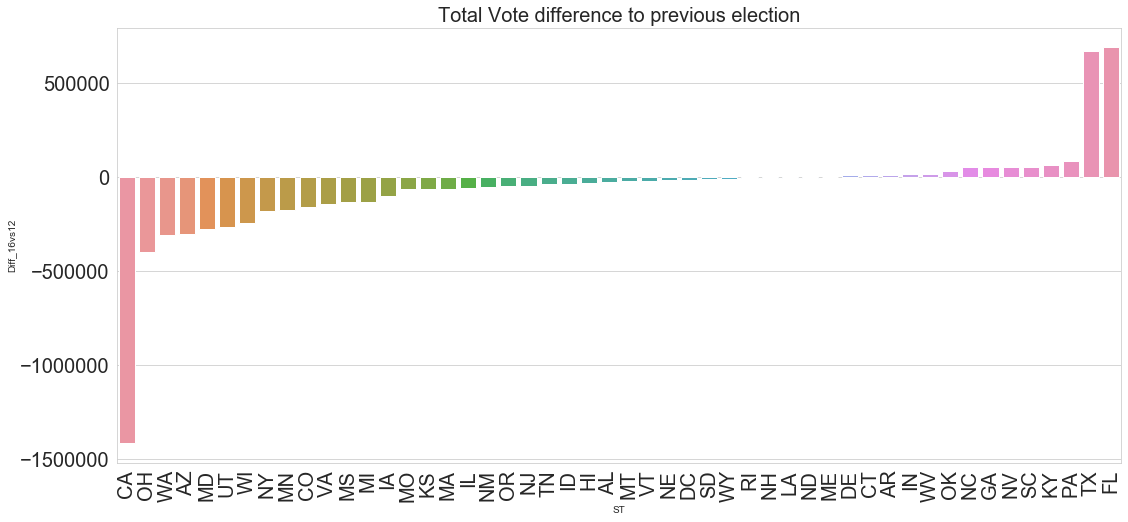

In [116]:
# I was curious as to how many people did not vote in 2016 compared to 2012

plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
plt.title('Total Vote difference to previous election', size = 20)
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["ytick.labelsize"]=20
sns.barplot(data = a, x='ST', y='Diff_16vs12')


In [101]:
# other than loss of votes per state I wanted to see the glogal difference
print('Vote Loss in 2016 compared to 2012: '+ str(a.Diff_16vs12.sum()))

Vote Loss in 2016 compared to 2012: -3055449.0


In [129]:
#I'm also curious about how each party lost votes by state - Used D for Democrats and R for Republicans
D = df_joined.groupby(['ST'], as_index=False)['Democrats_2012','Democrats_2016'].sum().sort_values('Democrats_2016',ascending=False)

In [130]:
#settin up the difference in votes just for democrats
for ind, row in D.iterrows():
    D.loc[ind,'DEM_Diff_16vs12'] = (row['Democrats_2016'])-(row['Democrats_2012'])
D = D.sort_values('DEM_Diff_16vs12')


In [131]:
#setting up the difference in votes just for Republicans
R = df_joined.groupby(['ST'], as_index=False)['Republicans_2012','Republicans_2016'].sum().sort_values('Republicans_2012',ascending=False)

In [132]:
for ind, row in R.iterrows():
    R.loc[ind,'REP_Diff_16vs12'] = (row['Republicans_2016'])-(row['Republicans_2012'])


In [133]:
R = R.sort_values('REP_Diff_16vs12')

 - For color palletes I used this guide: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/

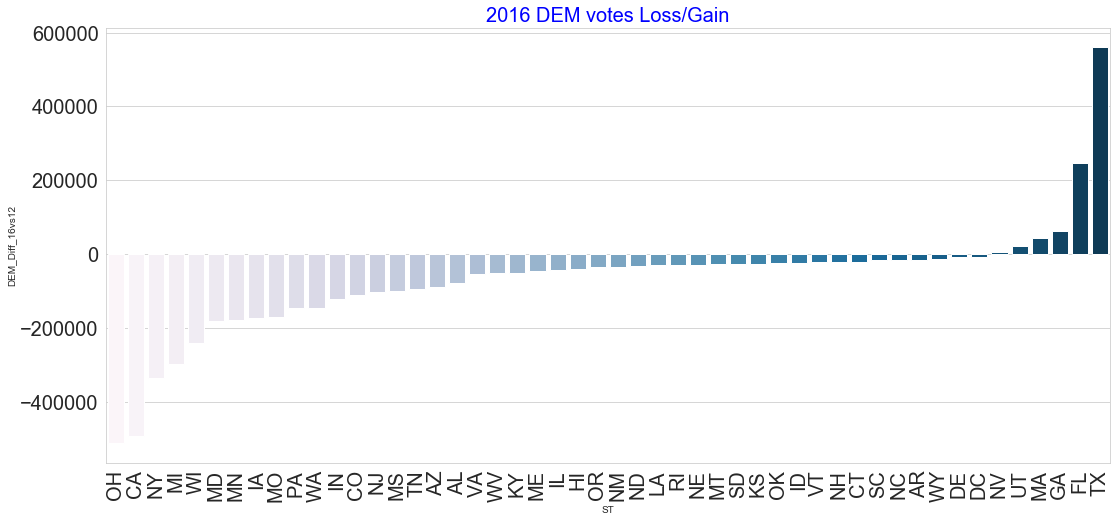

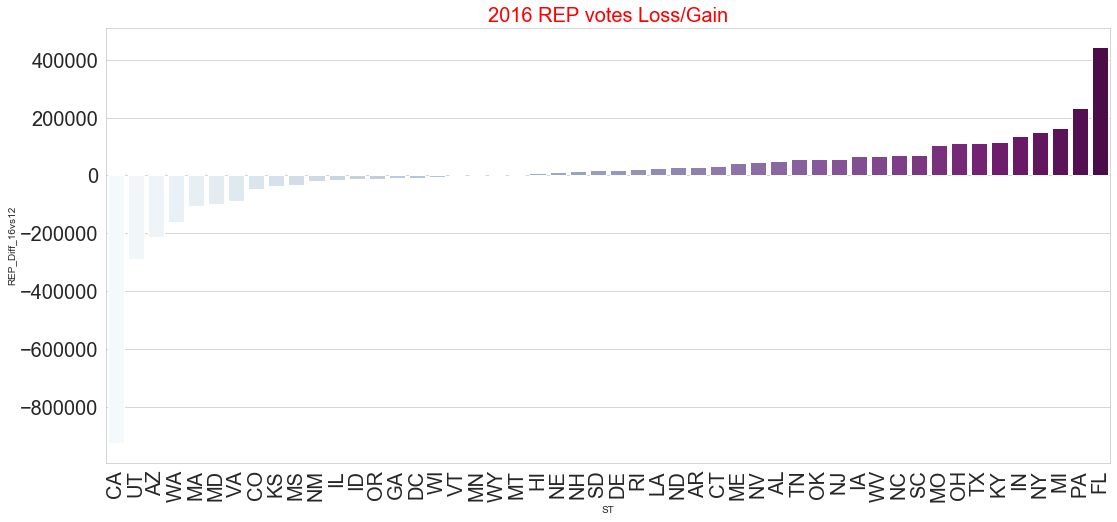

In [231]:
# Check loss and gain for each party

plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
plt.title('2016 DEM votes Loss/Gain', size = 20, color = 'Blue')
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["ytick.labelsize"]=20
sns.barplot(data = D, x='ST', y='DEM_Diff_16vs12', palette="PuBu")

plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
plt.title('2016 REP votes Loss/Gain', size = 20, color = 'Red')
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["ytick.labelsize"]=20
sns.barplot(data = R, x='ST', y='REP_Diff_16vs12', palette="BuPu")

In [141]:

print('DEM Vote Loss in 2016 compared to 2012: '+ str(D.DEM_Diff_16vs12.sum()))
print('REP Vote Loss in 2016 compared to 2012: '+ str(R.REP_Diff_16vs12.sum()))

DEM Vote Loss in 2016 compared to 2012: -3353418.0
REP Vote Loss in 2016 compared to 2012: 297969.0


Now to set other charts


In [252]:
# Check average age of voters

fig1 = df_joined[['median_age']]

Text(0.5, 1, 'Box Plot')

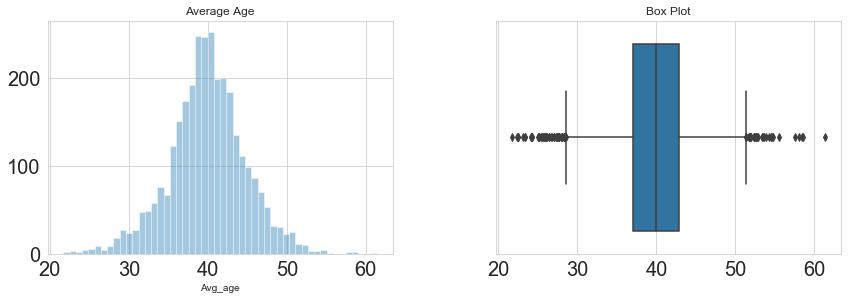

In [226]:
# Sizing subplots
fig, ax =plt.subplots(1,2, figsize=(12, 4))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3)

# Seaborne Code for each plot' - ax determines position for each one
sns.distplot(fig1, kde = False, ax = ax[0], axlabel = ('Avg_age')).set_title('Average Age')

sns.boxplot(fig1, ax = ax[1]).set_title("Box Plot")

# Boxplot was not required in question , But I was curious about maximus age compared to average,
# And here we can see that some counties have pretty high average age

Text(0.5, 1, 'AVG_Age vs DEM2016%Votes')

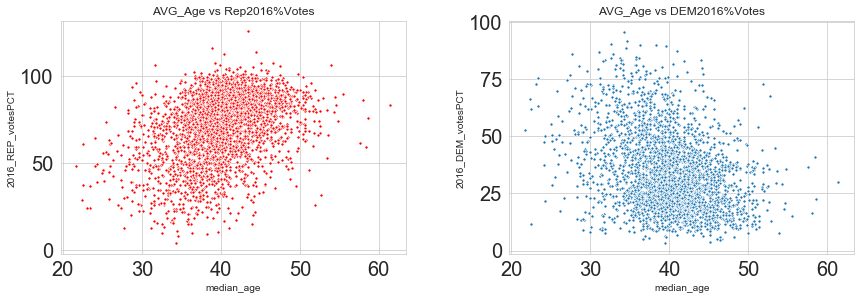

In [184]:
# The age had me curious about if there is a difference in age distribution fpr each party. 
# Sizing subplots
fig, ax =plt.subplots(1,2, figsize=(12, 4))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3)

# Seaborne Code for each plot

sns.scatterplot( data = df_joined, x='median_age', y='2016_REP_votesPCT', ax = ax[0],color = 'Red', s=10).set_title('AVG_Age vs Rep2016%Votes')
sns.scatterplot( data = df_joined, x='median_age', y='2016_DEM_votesPCT',ax = ax[1],  s=10).set_title('AVG_Age vs DEM2016%Votes')

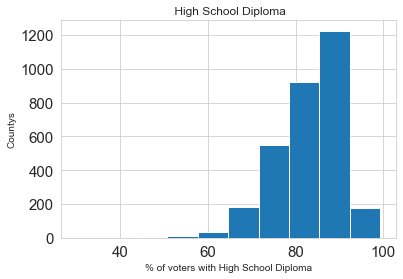

In [255]:
# Checking pct of voters with high school diplomas
plt.hist(df_joined['At Least High School Diploma'],bins=10)
plt.title(" High School Diploma")
plt.xlabel('% of voters with High School Diploma')
plt.ylabel('Countys')
plt.show()

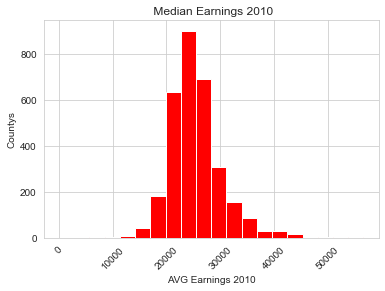

In [247]:
# this histogram displays the rate average earning of voter in 2010
#The histogram groups them by county count with each rate interval

plt.hist(df_joined['Median Earnings 2010'],bins=20, color = 'red')
plt.title(" Median Earnings 2010")
plt.xticks(rotation = 45)
plt.rcParams["xtick.labelsize"]=10
plt.rcParams["ytick.labelsize"]=10
plt.xlabel('AVG Earnings 2010')
plt.ylabel('Countys')
plt.show()

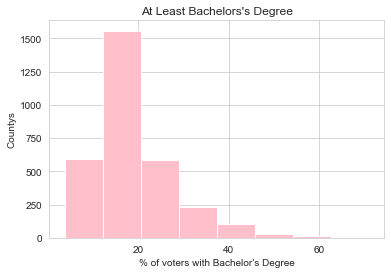

In [249]:
# the same for At Least Bachelors's Degree

plt.hist(df_joined["At Least Bachelors's Degree"],bins=8, color = 'pink')
plt.title("At Least Bachelors's Degree")
plt.rcParams["xtick.labelsize"]=15
plt.rcParams["ytick.labelsize"]=15
plt.xlabel("% of voters with Bachelor's Degree")
plt.ylabel('Countys')

plt.show()